In [1]:
# ! mkdir pycircos
# %cd pycircos
# ! mkdir sample_data
# %cd sample_data

# ! pip install biopython

In [2]:
# ! pip install python-circos

In [15]:
import pandas as pd
import numpy as np
import pycircos
import collections
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle


In [16]:
df = pd.read_csv('D:\\Git_Files\\Newresult.csv').dropna()
df['nlog10']= -np.log10(df.padj)
df

,log2FoldChange,padj,gene_name,nlog10
0,4.448731,5.083100e-272,Rv2650c,271.293871
1,3.718335,5.782500e-259,Rv0576,258.237884
2,6.235055,2.843100e-169,clpC2,168.546208
3,3.771801,7.971700e-164,mbtB,163.098449
4,-4.399156,1.136800e-162,PPE18,161.944316
...,...,...,...,...
3964,-0.000323,9.993884e-01,Rv1254,0.000266
3965,0.000545,9.995044e-01,lysU,0.000215
3966,-0.000177,9.998645e-01,espG2,0.000059
3967,0.000000,1.000000e+00,Rv3115,-0.000000


In [17]:
import plotly.express as px
import seaborn as sns

In [18]:
drug_mapping = {
    'Rv2650c': 1,
    'Rv0576': 2,
    'clpC2': 3,
    'mbtB': 4,
    'PPE18': 5,
    # Add more mappings for other drugs as needed
}

# Create a new column "DrugValue" based on the mapping
df['gene_val'] = df['gene_name'].map(drug_mapping)
df.head()

,log2FoldChange,padj,gene_name,nlog10,gene_val
0,4.448731,5.083100e-272,Rv2650c,271.293871,1.0
1,3.718335,5.782500e-259,Rv0576,258.237884,2.0
2,6.235055,2.843100e-169,clpC2,168.546208,3.0
3,3.771801,7.971700e-164,mbtB,163.098449,4.0
4,-4.399156,1.136800e-162,PPE18,161.944316,5.0


In [19]:
fig = px.sunburst(df, path=['log2FoldChange', 'padj'],
                  values='gene_val', color='gene_name')

# Set the width and height of the plot
fig.update_layout(width=800, height=600) 

fig.show()

In [20]:
# circle= Gcircle()

# with open('D:\\Git_Files\\Newresult.csv') as f:

#         f.readline()
#         for line in f:
#            line = line.rstrip().split(",")
#         if line and line[-1].isdigit():  # Check if the last element is a valid integer
#             name = line[0]
#             length = int(line[-1])
#             arc = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950, 1000), labelposition=60, label_visible=True)
#             circle.add_garc(arc)

import pandas as pd
from pycircos import Garc, Gcircle

# Initialize a Gcircle object
circle = Gcircle()

# Read the gene expression data from a CSV file
# data = pd.read_csv('D:\\Git_Files\\Newresult.csv')

colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    gene_name = row['gene_name']
    log2FoldChange = row['log2FoldChange']
    padj = row['padj']

    # Check if log2FoldChange and padj are valid numbers
    if isinstance(log2FoldChange, (int, float)) and isinstance(padj, (int, float)):
        # Define an arc for the gene
        arc = Garc(arc_id=gene_name, size=abs(log2FoldChange))
        
        # Set the fill color for the arc
        arc.fill_color = colors[index % len(colors)]  # Assign a color from the list based on the index
        
        # Add the arc to the Circos plot
        circle.add_garc(arc)

# Draw the Circos plot
# circle.figure
# In this updated code, we set the arc's fill color using the arc.style['fill_color'] attribute. You can modify the color as needed. This code should now work without errors and create Circos arcs with the specified style.

output_image = 'circos_plot.png'
circle.figure









<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [21]:
circle.figure

<Figure size 800x800 with 0 Axes>

In [22]:
circle.set_garcs()

In [23]:
# circle= Gcircle()

import collections
color_dict   = {"Rv2650c":"#FFFFFF00", "Rv0576":"#EEEEEE", "clpC2":"#BBBBBB", "mbtB":"#777777", "PPE18":"#000000", "qcrA":"#FFFFFF00", "desA1":"#C01E27", 
               "ribD":"#D82322"}

arcdata_dict = collections.defaultdict(dict)

with open('D:\\Git_Files\\Newresult.csv') as f:

        f.readline()
        for line in f:
           line = line.rstrip().split(",")
        if line and line[-1].isdigit():  # Check if the last element is a valid integer
            name = line[0]
            length = int(line[-1])
            arc = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950, 1000), labelposition=60, label_visible=True)
            circle.add_garc(arc)

            

In [25]:
df= pd.read_csv('D:\\Git_Files\\Newresult.csv').dropna()
df

,log2FoldChange,padj,gene_name
0,4.448731,5.083100e-272,Rv2650c
1,3.718335,5.782500e-259,Rv0576
2,6.235055,2.843100e-169,clpC2
3,3.771801,7.971700e-164,mbtB
4,-4.399156,1.136800e-162,PPE18
...,...,...,...
3964,-0.000323,9.993884e-01,Rv1254
3965,0.000545,9.995044e-01,lysU
3966,-0.000177,9.998645e-01,espG2
3967,0.000000,1.000000e+00,Rv3115


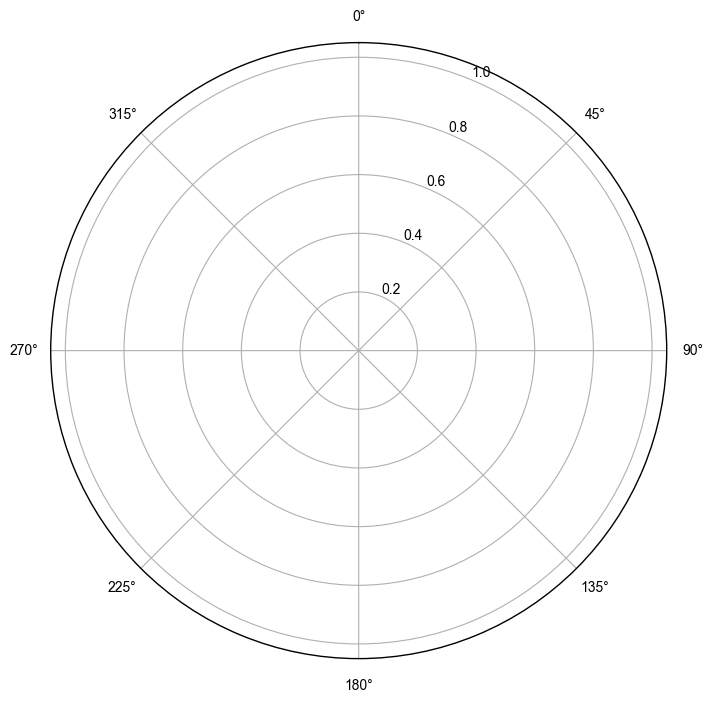

In [26]:
import pandas as pd
import collections
from circos import CircosPlot

# Read the gene expression data
df = pd.read_csv('D:\\Git_Files\\Newresult.csv').dropna()

# Define a color dictionary for gene names
color_dict = {
    "Rv2650c": "#FFFFFF00",
    "Rv0576": "#EEEEEE",
    "clpC2": "#BBBBBB",
    "mbtB": "#777777",
    "PPE18": "#000000",
    "qcrA": "#FFFFFF00",
    "desA1": "#C01E27",
    "ribD": "#D82322"
}

# Create a figure and axis for the Circos plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Iterate over the rows in the DataFrame and create arcs
for index, row in df.iterrows():
    name = row['gene_name']
    start = int(row['log2FoldChange'])
    width = int(row['padj']) - start
    color = color_dict.get(name, "#FFFFFF")

    # Calculate the arc angles
    start_angle = (start / 360) * 2 * 3.1416
    end_angle = ((start + width) / 360) * 2 * 3.1416

    ax.fill_between([start_angle, end_angle], 0, 1, color=color)

# Set the axis to have a circular layout
ax.set_theta_direction(-1)
ax.set_theta_offset(3.1416 / 2.0)

# Display the Circos plot
plt.show()





In [33]:
! pip install pycircos


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import collections
from pycircos import Gcircle

color_dict = {
    "Rv2650c": "#FFFFFF00",
    "Rv0576": "#EEEEEE",
    "clpC2": "#BBBBBB",
    "mbtB": "#777777",
    "PPE18": "#000000",
    "qcrA": "#FFFFFF00",
    "desA1": "#C01E27",
    "ribD": "#D82322"}

# Create a defaultdict to store arc data
arcdata_dict = collections.defaultdict(dict)

# Sample DataFrame data for demonstration
import pandas as pd
data = {
    'gene_name': ['Rv2650c', 'Rv0576', 'clpC2', 'mbtB', 'PPE18', 'qcrA', 'desA1', 'ribD'],
    'log2FoldChange': [2, 3, 4, 5, 6, 7, 8, 9],
    'padj': [10, 11, 12, 13, 14, 15, 16, 17]
}
df = pd.DataFrame(data)

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    name = row['gene_name']
    start = int(row['log2FoldChange']) - 1
    width = int(row['padj']) - (int(row['log2FoldChange']) - 1)
    
    # Ensure width is not zero or negative
    if width <= 0:
        width = 1

    if name not in arcdata_dict:
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["widths"] = []
        arcdata_dict[name]["colors"] = []

    arcdata_dict[name]["positions"].append(start)
    arcdata_dict[name]["widths"].append(width)
    arcdata_dict[name]["colors"].append(color_dict.get(name, "#FFFFFF"))

# Create a Circos plot
circle = Gcircle()

# Iterate over the arc data and create barplots
for key in arcdata_dict:
    print(f"Processing {key}: positions={arcdata_dict[key]['positions']}, widths={arcdata_dict[key]['widths']}, colors={arcdata_dict[key]['colors']}")
    
    # Ensure positions and widths have the correct sizes
    if len(arcdata_dict[key]["positions"]) == 0 or len(arcdata_dict[key]["widths"]) == 0:
        print(f"Skipping {key} due to empty positions or widths.")
        continue
    
    circle.barplot(key, data=[1] * len(arcdata_dict[key]["positions"]), 
                   positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], 
                   raxis_range=[950, 1000], 
                   facecolor=arcdata_dict[key]["colors"])

# Draw the Circos plot
circle.draw()


Processing Rv2650c: positions=[1], widths=[9], colors=['#FFFFFF00']


KeyError: 'Rv2650c'

<Figure size 800x800 with 0 Axes>

In [31]:
import collections
color_dict = {
    "Rv2650c": "#FFFFFF00",
    "Rv0576": "#EEEEEE",
    "clpC2": "#BBBBBB",
    "mbtB": "#777777",
    "PPE18": "#000000",
    "qcrA": "#FFFFFF00",
    "desA1": "#C01E27",
    "ribD": "#D82322"
}

# Create a defaultdict to store arc data
arcdata_dict = collections.defaultdict(dict)

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    name = row['gene_name']
    start = int(row['log2FoldChange']) - 1
    width = int(row['padj']) - (int(row['log2FoldChange']) - 1)

    if name not in arcdata_dict:
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["widths"] = []
        arcdata_dict[name]["colors"] = []

    arcdata_dict[name]["positions"].append(start)
    arcdata_dict[name]["widths"].append(width)
    arcdata_dict[name]["colors"].append(color_dict.get(name, "#FFFFFF"))

# Create a Circos plot
# circle = Circos(name="my_circos")

# Iterate over the arc data and create barplots
for key in arcdata_dict:
    circle.barplot(key, data=[1] * len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[950, 1000], facecolor=arcdata_dict[key]["colors"])

# Draw the Circos plot
circle.draw()

ZeroDivisionError: float division by zero

In [28]:
import collections

color_dict = {"Rv2650c": "#FFFFFF00", "Rv0576": "#EEEEEE", "clpC2": "#BBBBBB", "mbtB": "#777777", "PPE18": "#000000", "qcrA": "#FFFFFF00", "desA1": "#C01E27", "ribD": "#D82322"}

arcdata_dict = collections.defaultdict(dict)

with open('D:\\Git_Files\\Newresult.csv') as f:
    f.readline()
    for line in f:
        line = line.rstrip().split(",")
        if line and line[-1].isdigit():  # Check if the last element is a valid integer
            name = line[0]
            start = int(line[1]) - 1
            width = int(line[2]) - (int(line[1]) - 1)
            if name not in arcdata_dict:
                arcdata_dict[name]["positions"] = []
                arcdata_dict[name]["widths"] = []
                arcdata_dict[name]["colors"] = []
            arcdata_dict[name]["positions"].append(start)
            arcdata_dict[name]["widths"].append(width)
            arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1] * len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[950, 1000], facecolor=arcdata_dict[key]["colors"])


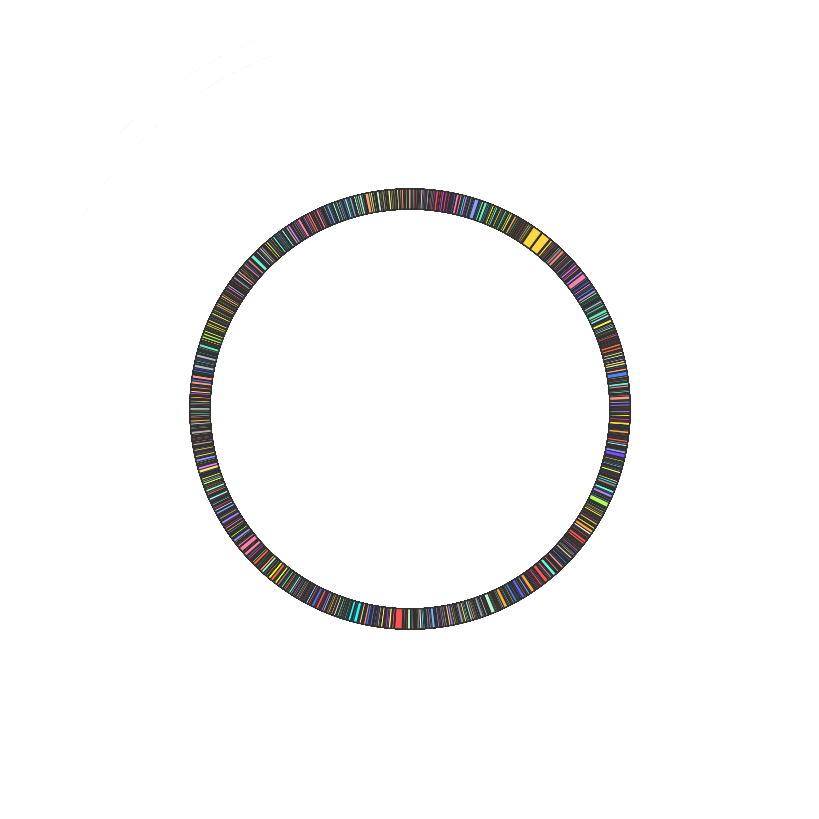

In [29]:
circle.figure